#EDA


In [1]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely not fire and fire.

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('Algerian_forest_fires.csv',skiprows=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
y=[x for x in df.columns]

In [7]:
y

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ']

In [8]:
#Need to remove spaces from column names ie ='Classes  '
col=map(str.strip,y)
df.columns=col

In [9]:
y=df.columns

In [10]:
y

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [11]:
for i in df.columns:
    print("col {} has".format(i),(df[i].isnull().sum()), "mssing values and percentage of missing value is around ", round((df[i].isnull().sum())/df[i].shape[0],3)," %")

col day has 0 mssing values and percentage of missing value is around  0.0  %
col month has 1 mssing values and percentage of missing value is around  0.004  %
col year has 1 mssing values and percentage of missing value is around  0.004  %
col Temperature has 1 mssing values and percentage of missing value is around  0.004  %
col RH has 1 mssing values and percentage of missing value is around  0.004  %
col Ws has 1 mssing values and percentage of missing value is around  0.004  %
col Rain has 1 mssing values and percentage of missing value is around  0.004  %
col FFMC has 1 mssing values and percentage of missing value is around  0.004  %
col DMC has 1 mssing values and percentage of missing value is around  0.004  %
col DC has 1 mssing values and percentage of missing value is around  0.004  %
col ISI has 1 mssing values and percentage of missing value is around  0.004  %
col BUI has 1 mssing values and percentage of missing value is around  0.004  %
col FWI has 1 mssing values and 

In [12]:
#I got to know these are the only rows  that are missing so we can remove them
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [13]:
#REMOVE IT 
df=df[~df['Classes'].isnull()]
df=df[df['Classes']!='Classes']
df.shape


(244, 14)

In [14]:
#Analysis date features 

date_features=['day','month','year']
for i in date_features:
    print("The feaures {} has ".format(i),df[i].nunique(), "unique categories and values are ",df[i].unique())

The feaures day has  32 unique categories and values are  ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' 'day']
The feaures month has  5 unique categories and values are  ['06' '07' '08' '09' 'month']
The feaures year has  2 unique categories and values are  ['2012' 'year']


In [15]:
df['day'].value_counts()

01     8
02     8
30     8
29     8
28     8
27     8
26     8
25     8
24     8
23     8
22     8
21     8
20     8
19     8
18     8
17     8
16     8
15     8
13     8
12     8
11     8
10     8
09     8
08     8
07     8
06     8
05     8
04     8
03     8
14     7
31     4
day    1
Name: day, dtype: int64

In [16]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [17]:
df = df[df['day'] != 'day']
df.shape

(243, 14)

In [18]:
#Analysis date features 

date_features=['day','month','year']
for i in date_features:
    print("The feaures {} has ".format(i),df[i].nunique(), "unique categories and values are ",df[i].unique())

The feaures day has  31 unique categories and values are  ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
The feaures month has  4 unique categories and values are  ['06' '07' '08' '09']
The feaures year has  1 unique categories and values are  ['2012']


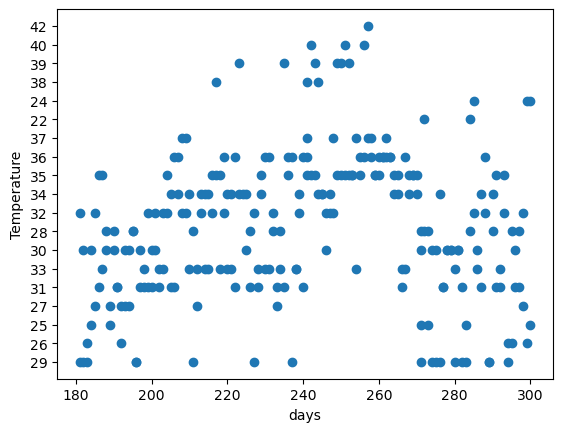

In [19]:
#for Regreesion probelm
data=df.copy()
data['day']=pd.to_numeric(data['day'])
data['month']=pd.to_numeric(data['month'])

data['days']=data['day']+30*data['month']

plt.scatter(data['days'],data['Temperature'])
plt.xlabel('days')
plt.ylabel('Temperature')
plt.show()

In [20]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

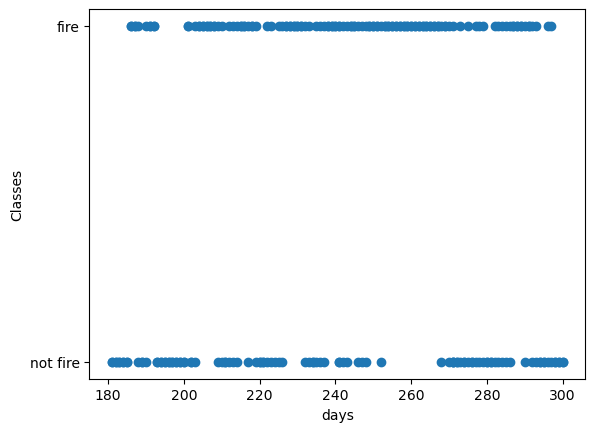

In [21]:
#for classification probelm
data=df.copy()

data['day']=pd.to_numeric(data['day'])
data['month']=pd.to_numeric(data['month'])

data['days']=data['day']+30*data['month']
data['Classes']=data['Classes'].apply(lambda x : str(x).strip())

plt.scatter(data['days'],data['Classes'])
plt.xlabel('days')
plt.ylabel('Classes')
plt.show()


In [22]:
#so we can remove year features because it has only one value and trasform month and day in one
#feature in "feature engineering section"


In [23]:
df.shape

(243, 14)

In [24]:
# Find out all numeric features

num_features=[x for x in df.columns if x not in ['day','month','year','Classes']]
df[num_features]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [25]:
#discrete feature in num feature

discrete_features=[feature for feature in num_features if len(df[feature].unique())<15 ]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 0


In [26]:
#so here we can make conclusion all the numeric features are continous in nature because we dont have any discrete features
# num_features=cont_features+discrete_features
cont_features=num_features

In [27]:
df.shape

(243, 14)

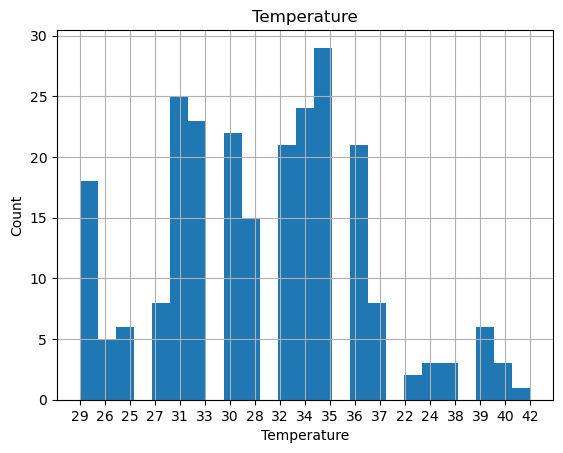

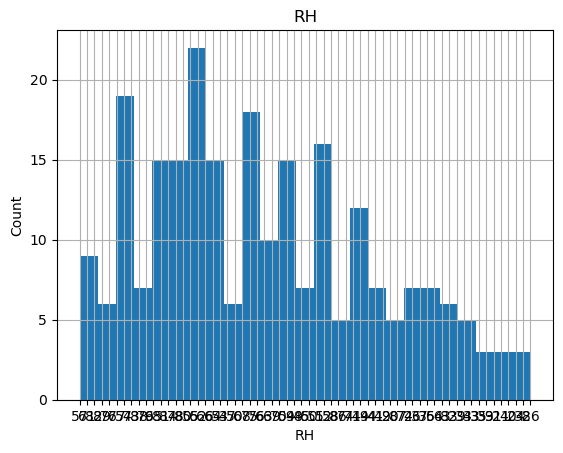

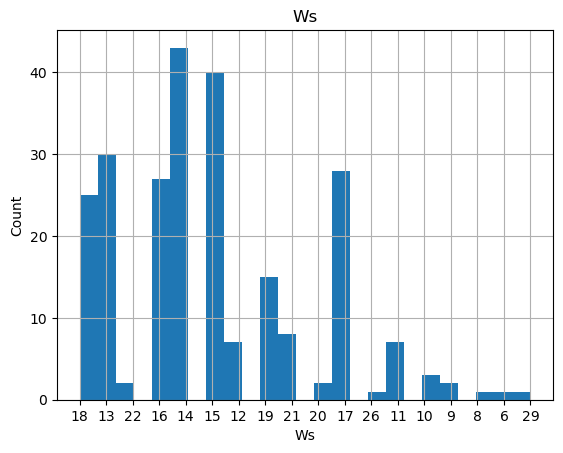

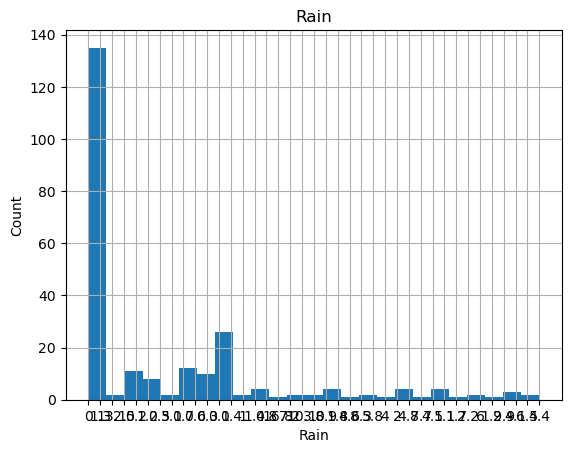

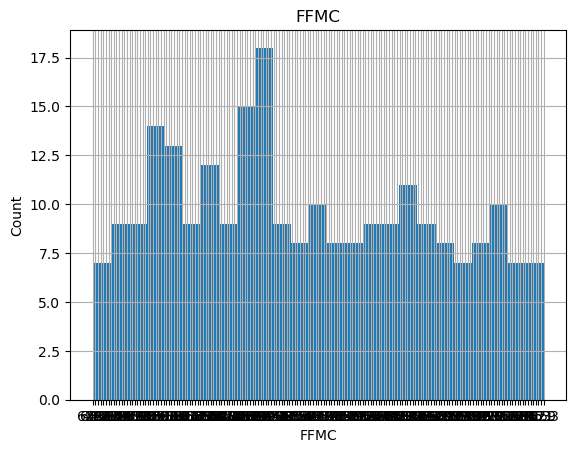

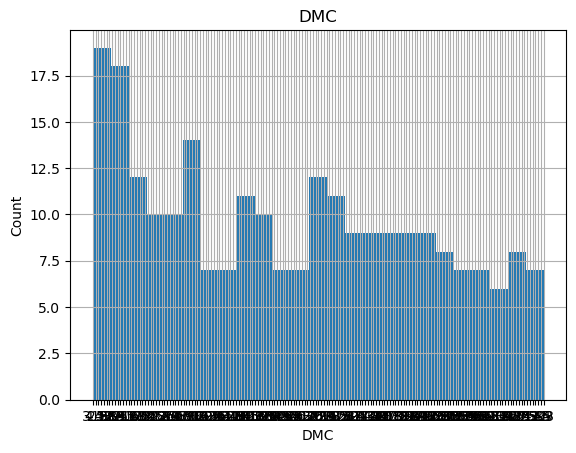

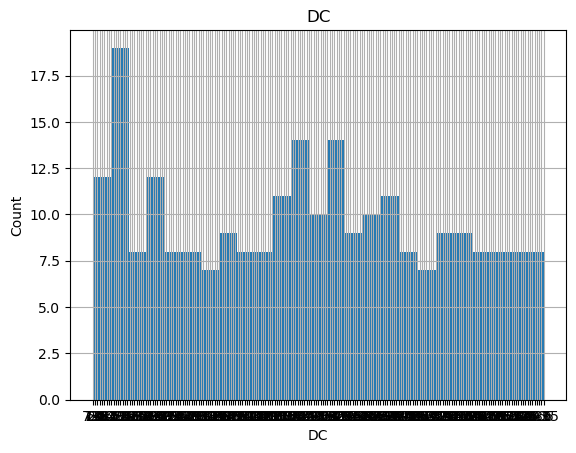

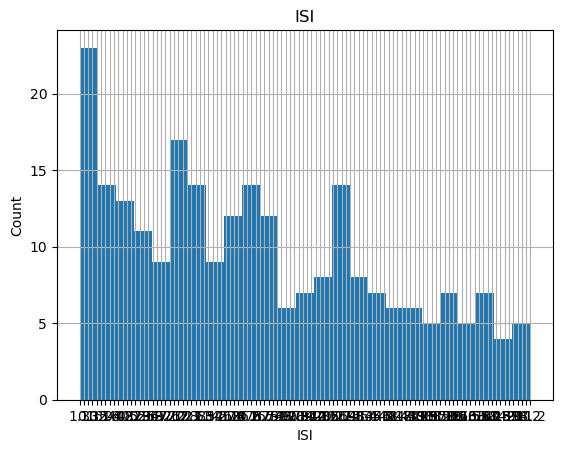

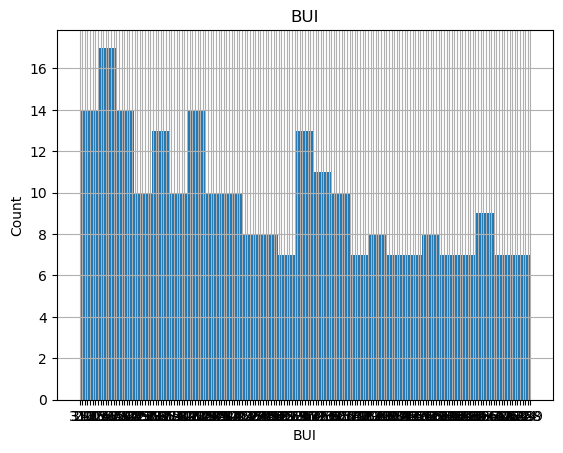

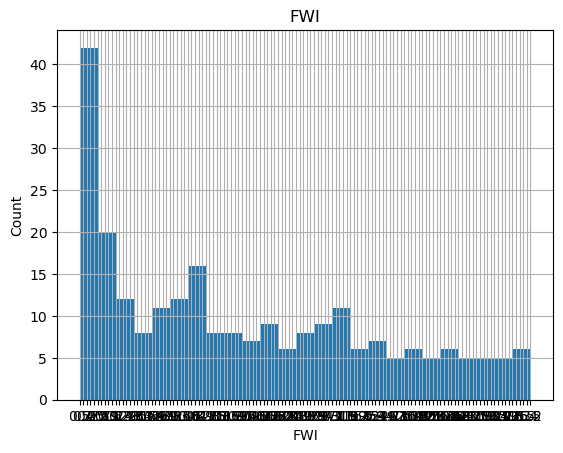

In [28]:
for feature in cont_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [29]:
#by only observing graph we can't say about nature og graph here.
# there are 2 features rain and FWI that is right skewed distribution

In [30]:
# lets tranform logrithmic and alayzie the destribution
data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])

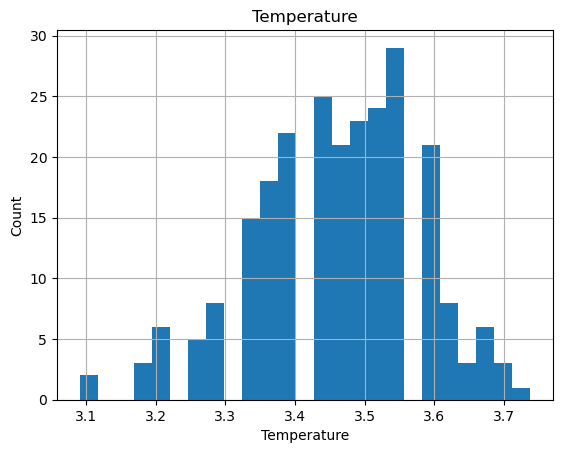

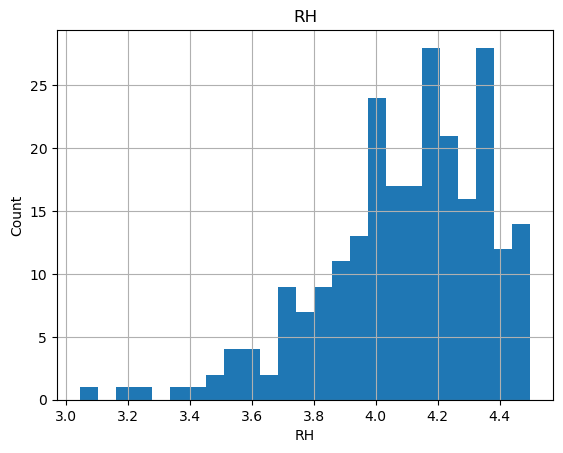

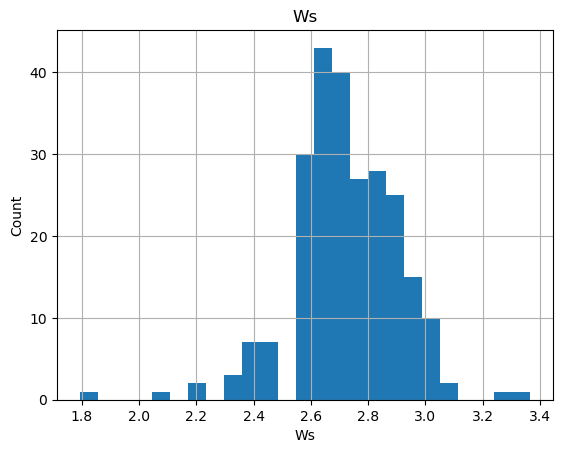

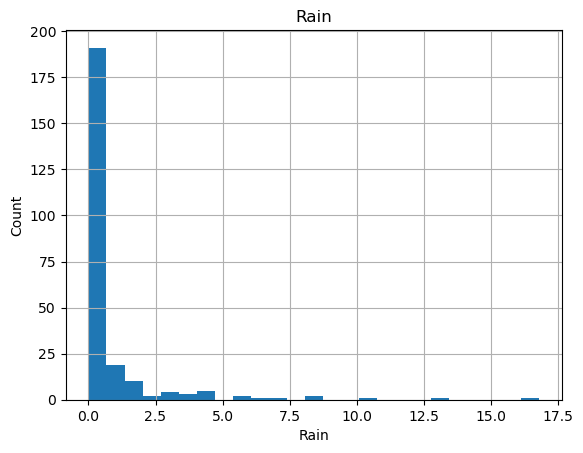

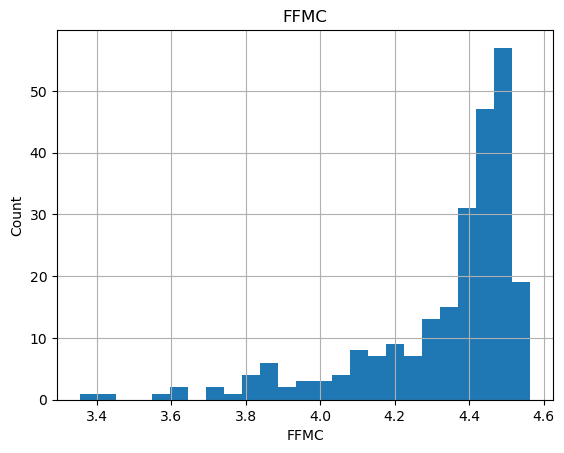

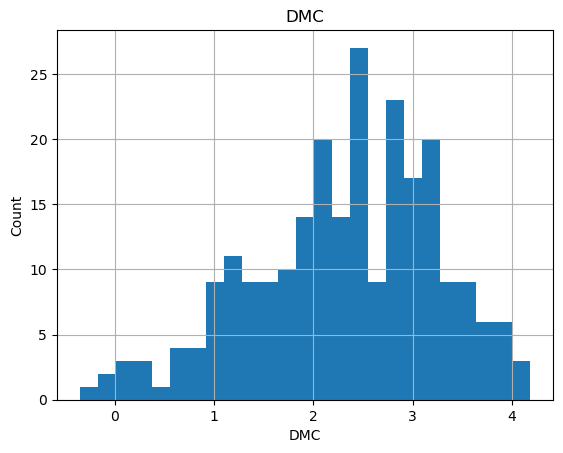

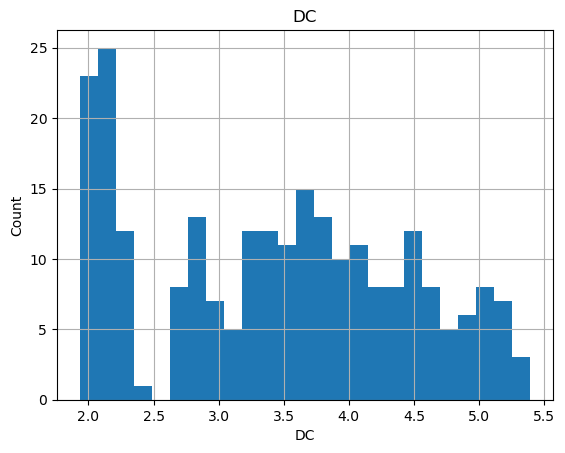

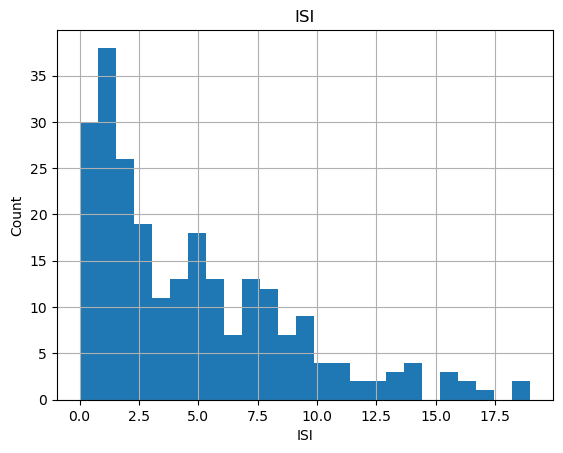

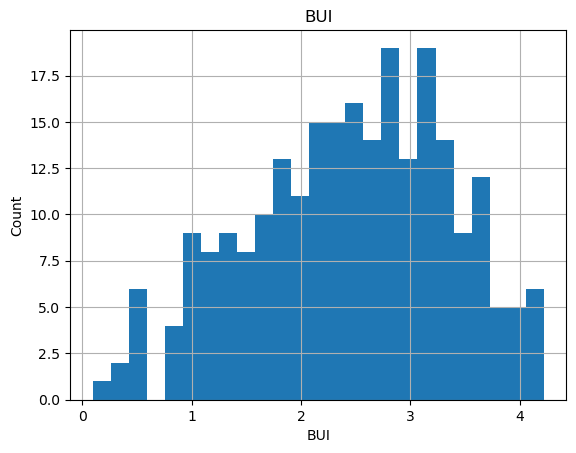

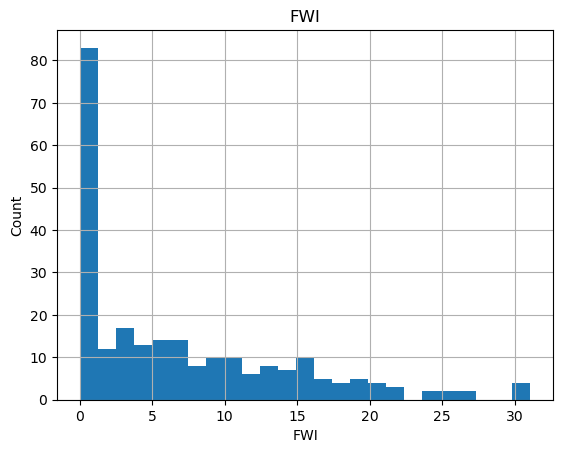

In [31]:
for feature in cont_features:
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [32]:
#so I observed after transfomation all fetures follow normal distrubtion excpt rain and FWI
# because these features have 0 value present in that beucause of that log tranformin was not happend. so we can go 
# with the orginal features value without log transformation.

In [33]:
#Check variance of continuous features
data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    print("the variance of df {} is ".format(feature),statistics.variance(data[feature]))

the variance of df Temperature is  13.16267047580179
the variance of df RH is  219.87433255110022
the variance of df Ws is  7.903887358432813
the variance of df Rain is  4.012837465564738
the variance of df FFMC is  205.91220419685067
the variance of df DMC is  153.58743427541407
the variance of df DC is  2272.0099938781755
the variance of df ISI is  17.257658742305207
the variance of df BUI is  202.44796789443254
the variance of df FWI is  55.362048090330916


In [34]:
# I observed the varaiance is too high for dome features so we need to scale down values using standardization

In [35]:
# Checking if we have Classes have out put feature ,then just check balance/imblanced of data  for classification probelems

data=df.copy()
data['Classes']=data['Classes'].apply(lambda x : str(x).strip())
data['Classes']=data['Classes'].map({"not fire":0,"fire":1})
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [36]:
#conclusion it seems to be balanced data

In [37]:
#check multi collinearity
data=df.copy()
cfeatures=[x for x in data.columns if x not in ['Classes','year']]
data[cfeatures]=data[cfeatures].astype(float)
data[cfeatures].corr()



,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895


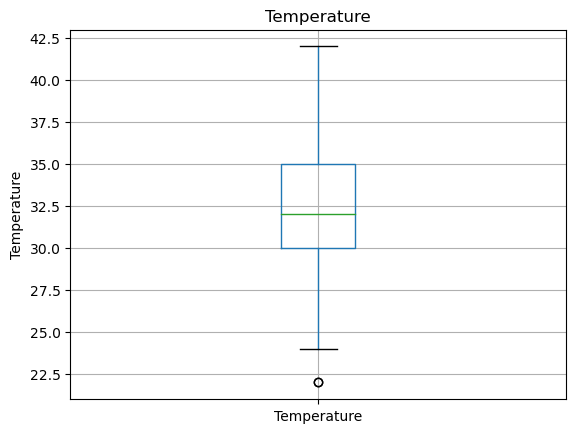

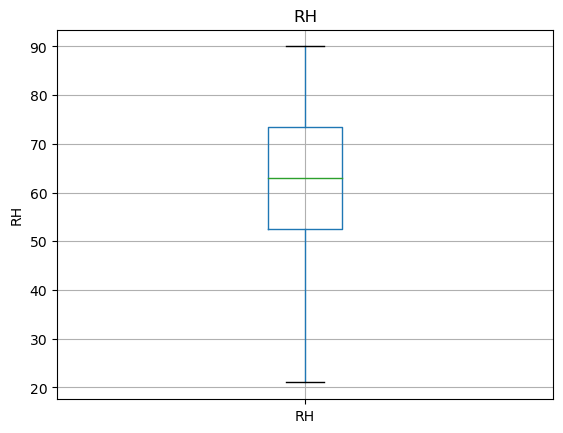

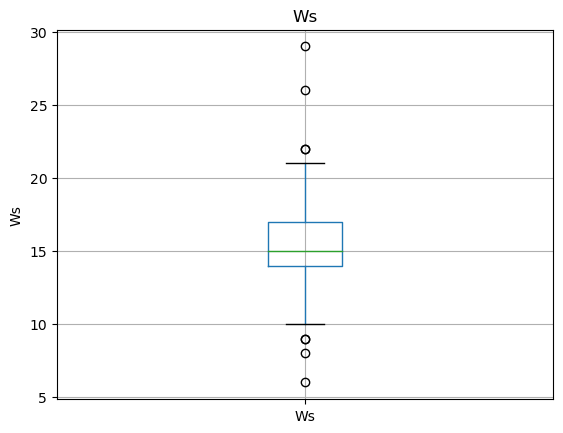

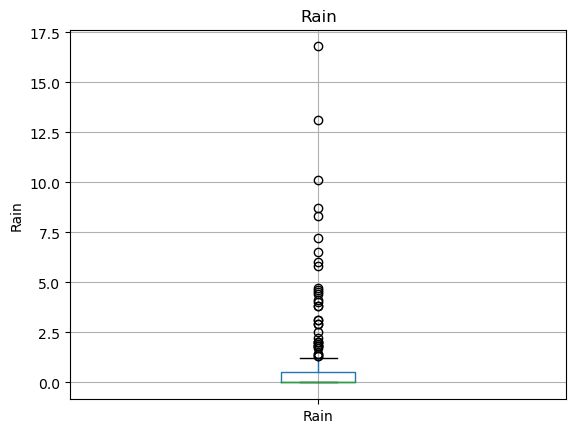

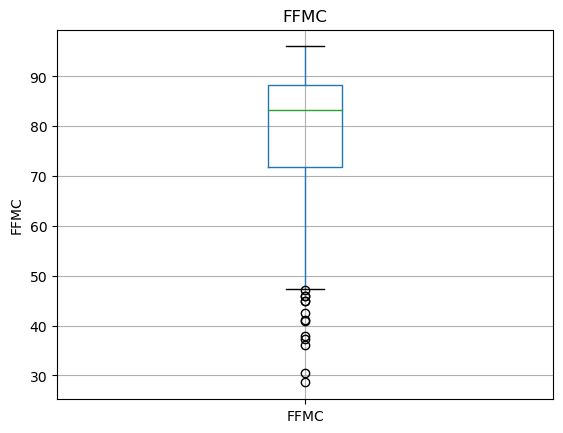

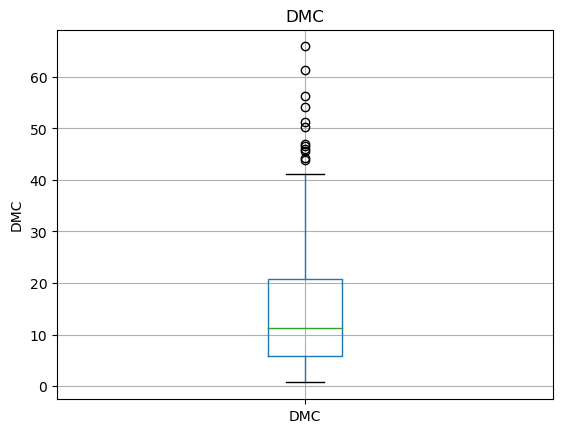

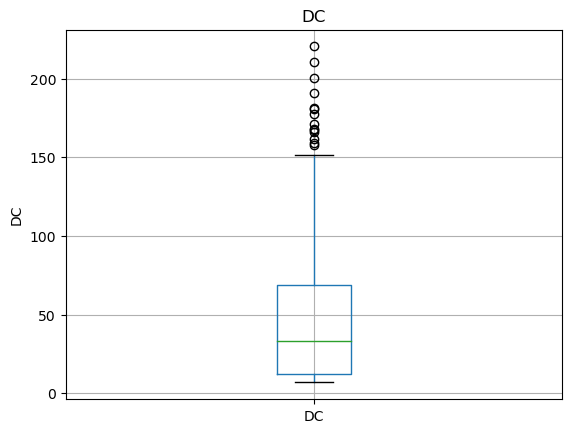

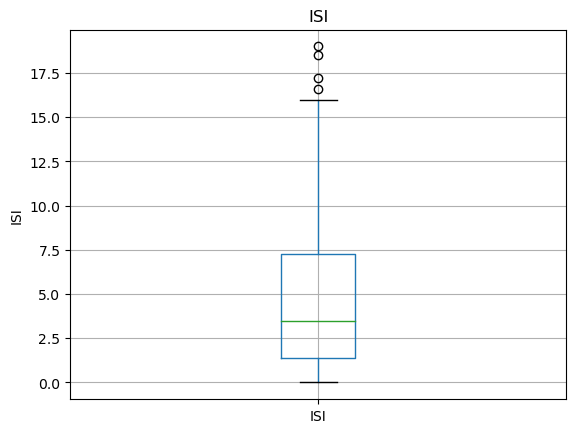

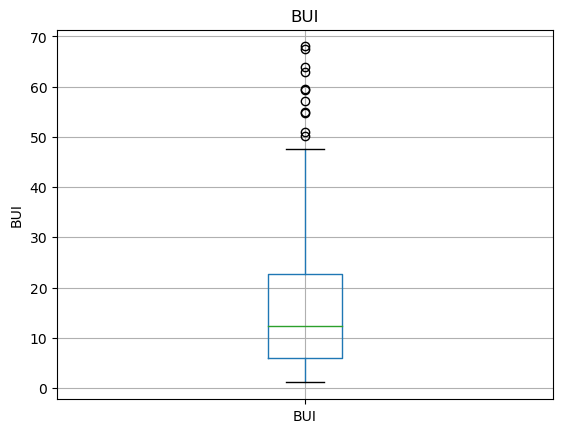

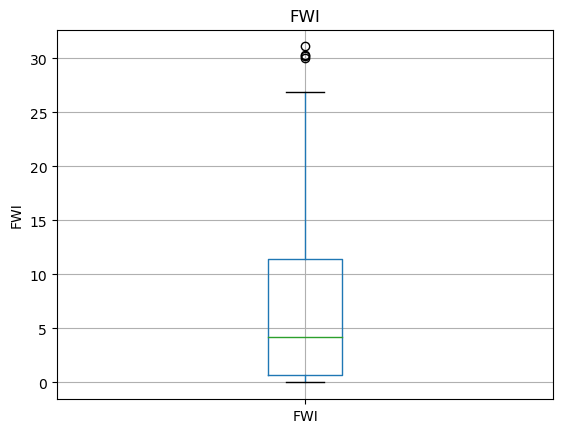

In [38]:
#checking Outliers

data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Feature engineering

In [39]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [40]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [41]:
# Date feature transformation and remove un neccessary columns
df['day']=pd.to_numeric(df['day'])
df['month']=pd.to_numeric(df['month'])
df['days']=df['day']+30*df['month']

df=df.drop(['day', 'month','year'], axis = 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,181
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,182
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,183
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,184
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,185


In [42]:
#Update "Classes" feature first by removing extra spaces then encode nominally 

df['Classes']=df['Classes'].apply(lambda x : str(x).strip())
df['Classes']=df['Classes'].map({"not fire":0,"fire":1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,181
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,182
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,183
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,184
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,185


In [43]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
days           0
dtype: int64

In [44]:
# convert all features into numeric 
y=df.columns
df[y]=df[y].astype(float)

In [45]:
df.dtypes

Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes        float64
days           float64
dtype: object

In [46]:
df.shape

(243, 12)

#creating classifaication model

In [47]:
#Dependent and independent variable
x=df[[x for x in df.columns if x !='Classes']]
y=df['Classes']

In [48]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,days
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,181.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,182.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,183.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,184.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,185.0
...,...,...,...,...,...,...,...,...,...,...,...
241,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,296.0
242,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,297.0
243,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,298.0
244,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,299.0


In [49]:
#Train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [51]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [52]:
print(log_regressor.best_params_)

{'C': 6, 'penalty': 'l2'}


In [53]:
print(log_regressor.best_score_)

0.9647058823529411


In [54]:
y_pred=log_regressor.predict(x_test)

In [55]:
y_pred

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1.])

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
confusion_matrix(y_test,y_pred)

array([[30,  0],
       [ 5, 38]], dtype=int64)

In [57]:
f1_score(y_test,y_pred)

0.9382716049382717

In [58]:
accuracy_score(y_test,y_pred)

0.9315068493150684

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        30
         1.0       1.00      0.88      0.94        43

    accuracy                           0.93        73
   macro avg       0.93      0.94      0.93        73
weighted avg       0.94      0.93      0.93        73



#KNN ClassifiCation

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [62]:
error_rate = []
from sklearn.model_selection import cross_val_score

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

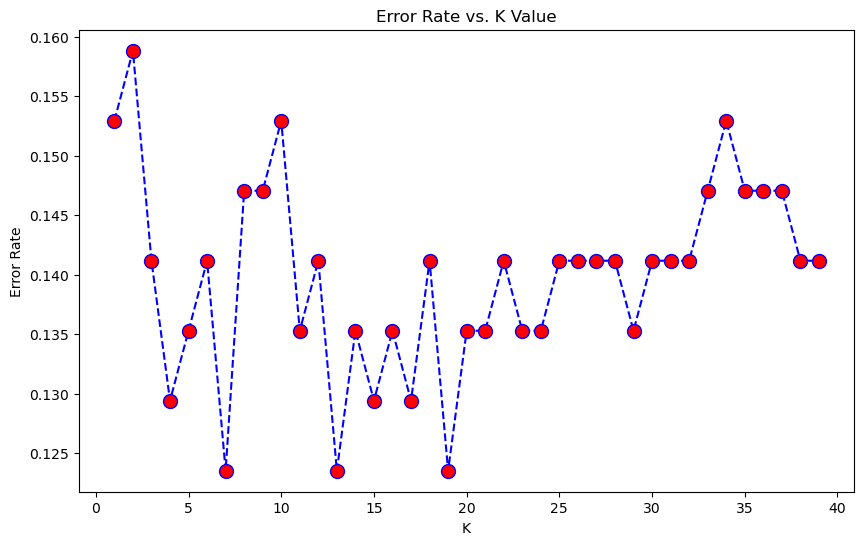

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
        # markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
#by graph,now with k=19
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
confusion_matrix(y_test,pred)

array([[28,  2],
       [13, 30]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

         0.0       0.68      0.93      0.79        30
         1.0       0.94      0.70      0.80        43

    accuracy                           0.79        73
   macro avg       0.81      0.82      0.79        73
weighted avg       0.83      0.79      0.80        73



#Support vector classification

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [67]:
## Hyper Parameter Optimization

params={
        "kernel": ["linear", "poly", "rbf", "sigmoid"] ,
        "degree" : [ 1,2,3, 4, 5, 6],
        "gamma" : ["scale","auto"]
    }
print(params)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['scale', 'auto']}


In [68]:
from sklearn.svm import SVC
sv_classifier = SVC()

In [69]:

SVC_=GridSearchCV(sv_classifier,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=0)

In [70]:
SVC_.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [71]:
SVC_.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [72]:
y_pred = SVC_.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[28  2]
 [ 6 37]]


0.8904109589041096

In [74]:
precision_score(y_test, y_pred)

0.9487179487179487

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        30
         1.0       0.95      0.86      0.90        43

    accuracy                           0.89        73
   macro avg       0.89      0.90      0.89        73
weighted avg       0.90      0.89      0.89        73



#NBB Classification

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [77]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred = nb_classifier.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28  2]
 [ 4 39]]


0.9178082191780822

In [80]:
precision_score(y_test, y_pred)

0.9512195121951219

In [81]:
recall_score(y_test, y_pred)

0.9069767441860465

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        30
         1.0       0.95      0.91      0.93        43

    accuracy                           0.92        73
   macro avg       0.91      0.92      0.92        73
weighted avg       0.92      0.92      0.92        73



#Decesion Tree classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()


In [84]:
## Hyper Parameter Optimization

params={
        "splitter"  : ["best","random"] ,
        "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_samples_leaf" : [ 1,2,3,4,5 ],
        "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
        "max_features" : ["auto","log2","sqrt",None ],
        "max_leaf_nodes":[None,10,20,30,40,50,60,70]}
    

In [85]:
DT_G=GridSearchCV(dt_classifier,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
DT_G.fit(x_train,y_train)
DT_G.best_params_

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


{'max_depth': 12,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [86]:
y_pred=DT_G.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29  1]
 [ 0 43]]


0.9863013698630136

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        30
         1.0       0.98      1.00      0.99        43

    accuracy                           0.99        73
   macro avg       0.99      0.98      0.99        73
weighted avg       0.99      0.99      0.99        73



#Random forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [90]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [95]:
GSV_rf = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5,random_state=0, n_jobs = 2)
GSV_rf.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error')

In [97]:
#above i use randomised search cv to reduce searching space.
GSV_rf.best_params_


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [98]:
y_pred=GSV_rf.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[30  0]
 [ 3 40]]


0.958904109589041

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        30
         1.0       1.00      0.93      0.96        43

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73

